# Concrete Compressive Strength
### Realizado por: Bogdan Rivera

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# metadata
print(concrete_compressive_strength.metadata)

# variable information
print(concrete_compressive_strength.variables)


{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

Visualización de las variables características y variables objetivo.


In [4]:
print("Variables características")
print(X[:5])
print("Variables objetivo")
print(y[:5])

Variables características
   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  
0            1040.0           676.0   28  
1            1055.0           676.0   28  
2             932.0           594.0  270  
3             932.0           594.0  365  
4             978.4           825.5  360  
Variables objetivo
   Concrete compressive strength
0                          79.99
1                          61.89
2                          40.27
3                          41.05
4                          44.30


Conversión a un tipo de dato de pandas y visualización de los primeros cinco registros.

In [5]:
import pandas as pd
df = pd.concat([X, y], axis=1)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Verificación de datos nulos o incompletos:

In [6]:
print(df.isnull().sum())

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64


Para este caso no existen valores nulos o incompletos.

Verificación de los tipos de datos.

In [7]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

Cement: float64
Blast Furnace Slag: float64
Fly Ash: float64
Water: float64
Superplasticizer: float64
Coarse Aggregate: float64
Fine Aggregate: float64
Age: int64
Concrete compressive strength: float64


Todos los valores son de tipo flotante. Revisando una descripción de todos los datos:

In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


En el caso de los registros completos, se tiene lo siguiente.

In [9]:
print("Las caracteristicas son:")
print(df.columns)
print("El número de registros es: ")
print(len(df))

Las caracteristicas son:
Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')
El número de registros es: 
1030


Una vez que se observaron los datos se procede a realizar los diagramas para verificar que no existan outliers. Esto se puede realizar en una sola gráfica.

<ipython-input-10-2e298fadcce4>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i + 1)


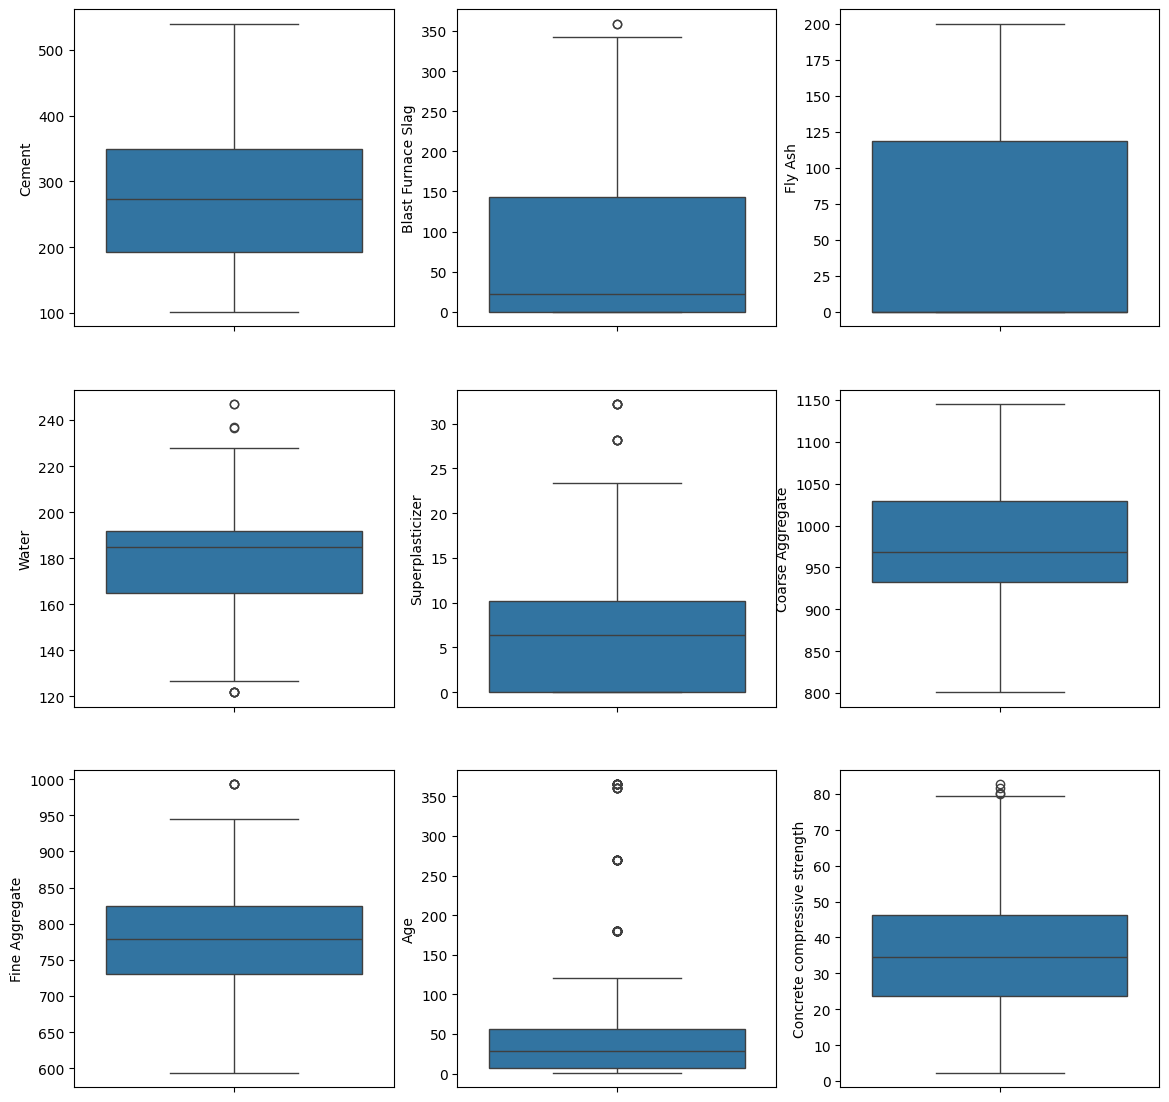

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 14))
plt.title("Boxplot de las características")

for i in range(len(df.columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df[df.columns[i]])

Existen algunos outliers en las variables de ['Blast Furnace Slag','Water','Superplasticizer','Fine Aggregate', 'Age', 'Concrete compressive strength'].

De igual forma se requiere conocer la distribución de los datos.

<ipython-input-11-a3ff0b360294>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i + 1)
<ipython-input-11-a3ff0b360294>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]])
<ipython-input-11-a3ff0b360294>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code

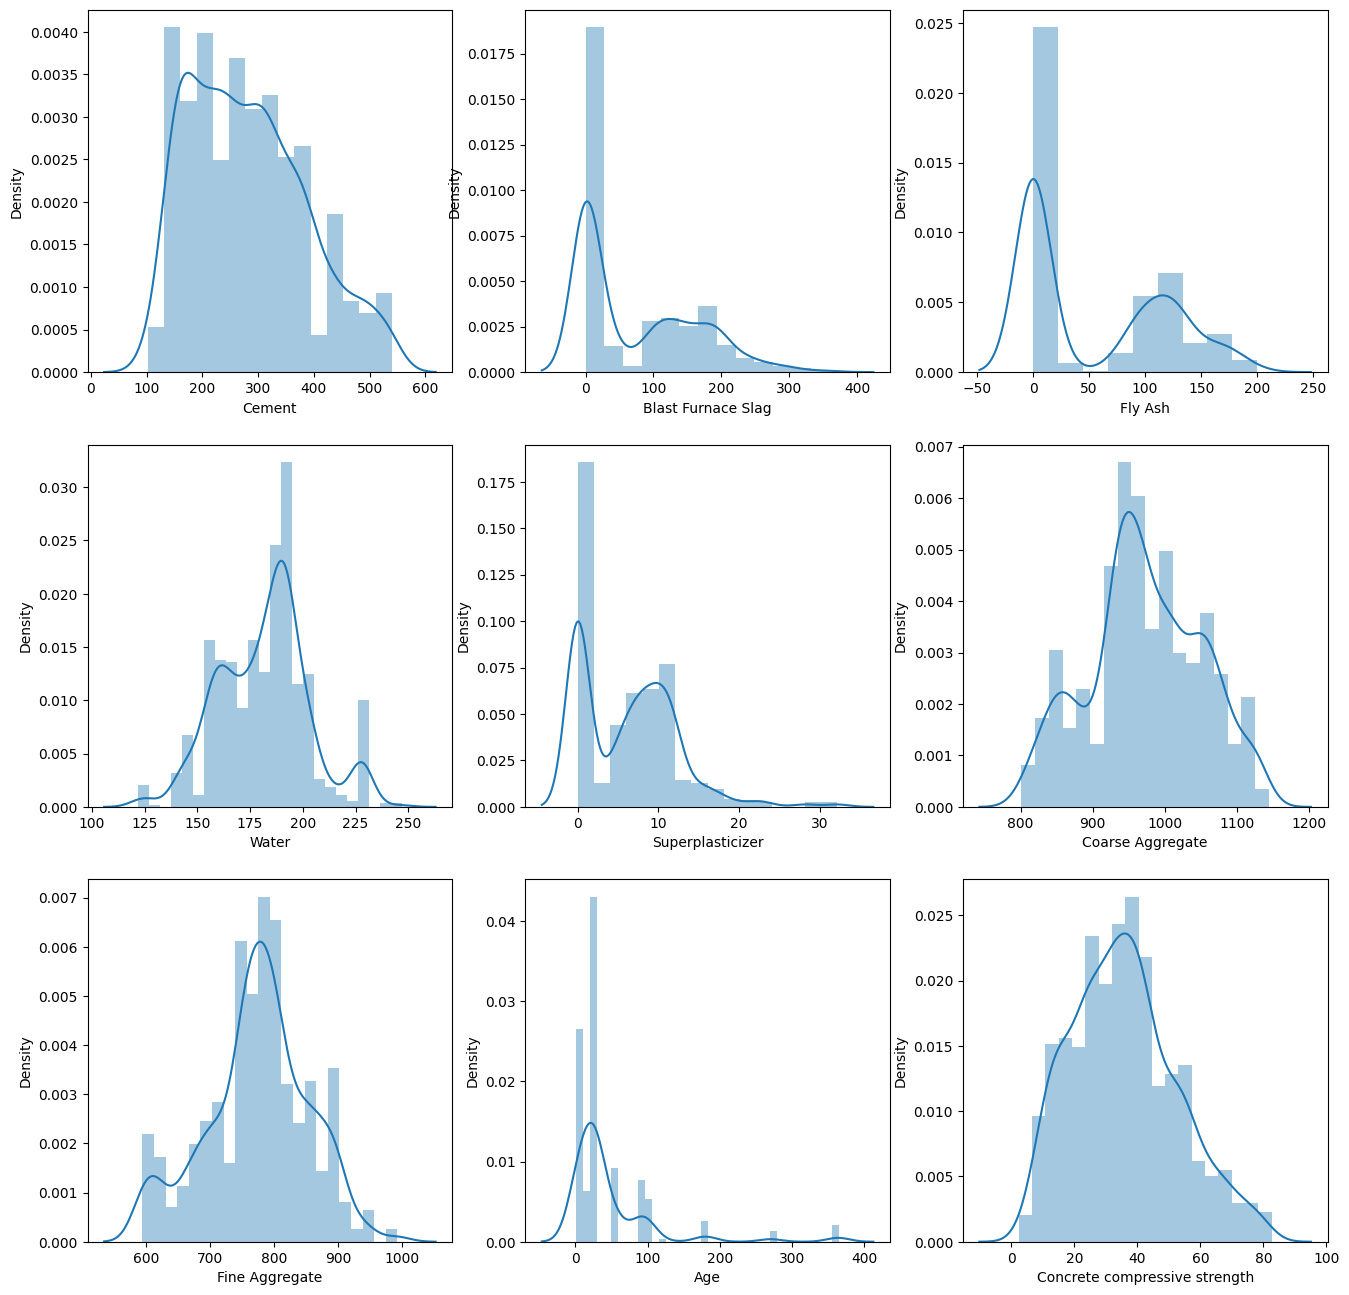

In [11]:
plt.figure(figsize=(16, 16))
plt.title("Distribución de las características")

for i in range(len(df.columns)):
    plt.subplot(3, 3, i + 1)
    sns.distplot(df[df.columns[i]])

Como se puede observar en las anteriores gráficas, en algunos casos se tienen diversas distribuciones: sesgada a la derecha, bimodal,normal, entre otras.

Para seguir con el proceso se puede realizar una  winsorización la cual es una técnica que reemplaza los valores atípicos por el valor más cercano que no se considera un outlier según ciertos criterios.

In [12]:
from scipy.stats.mstats import winsorize
df_winsorized = df.copy()
for col in df_winsorized.columns:
    df_winsorized[col] = winsorize(df_winsorized[col], limits=[0.05, 0.05])

Nuevamente se puede proceder a realizar los boxplots.


<ipython-input-13-97f001d5b05c>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i + 1)


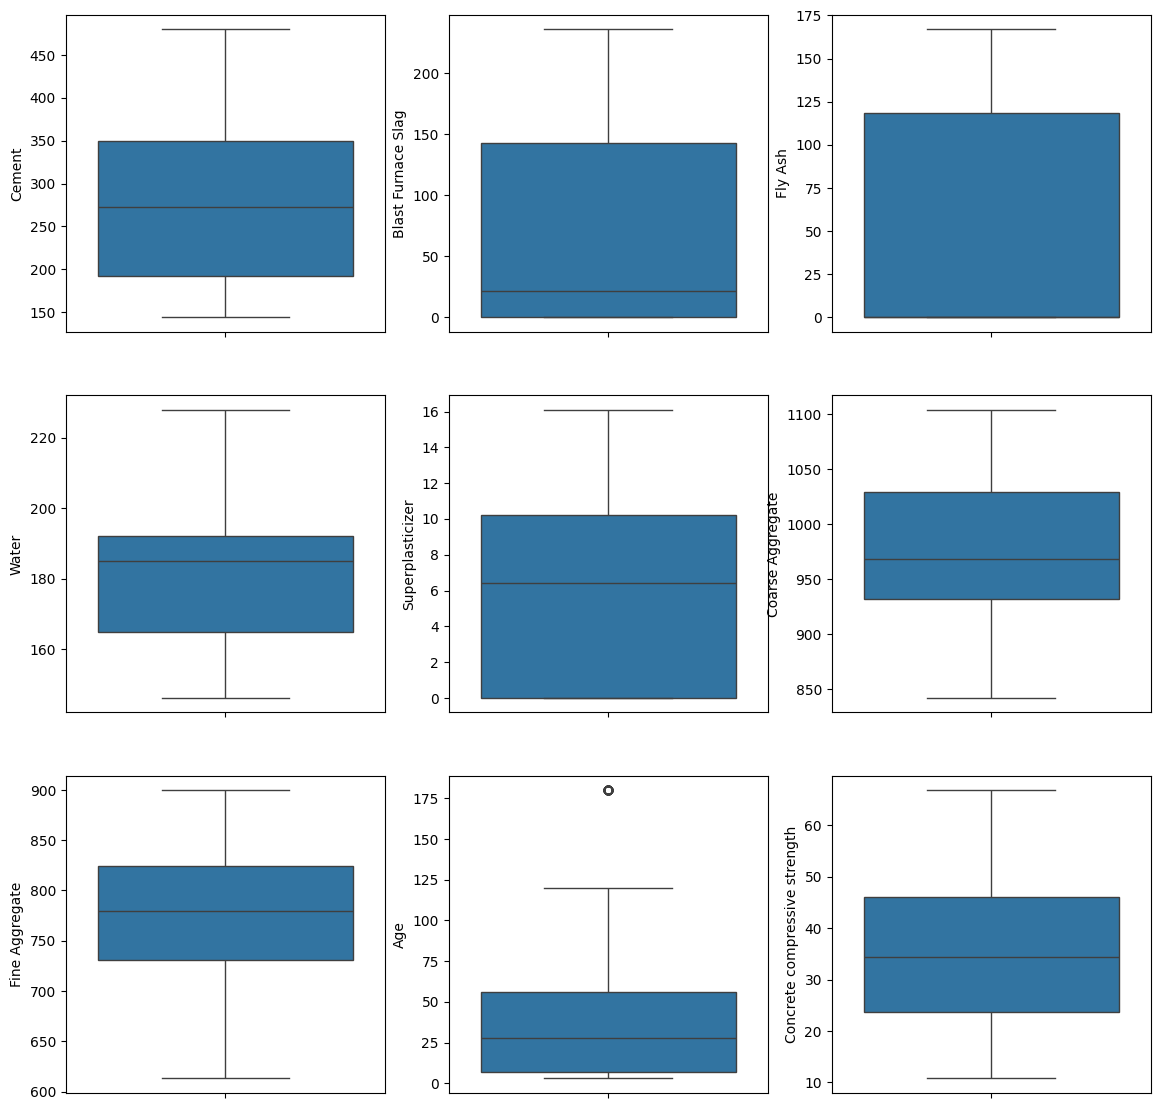

In [13]:
plt.figure(figsize=(14, 14))
plt.title("Boxplot de las características")

for i in range(len(df_winsorized.columns)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df_winsorized[df_winsorized.columns[i]])

De igual forma se puede utilizar gráficas de correlación.

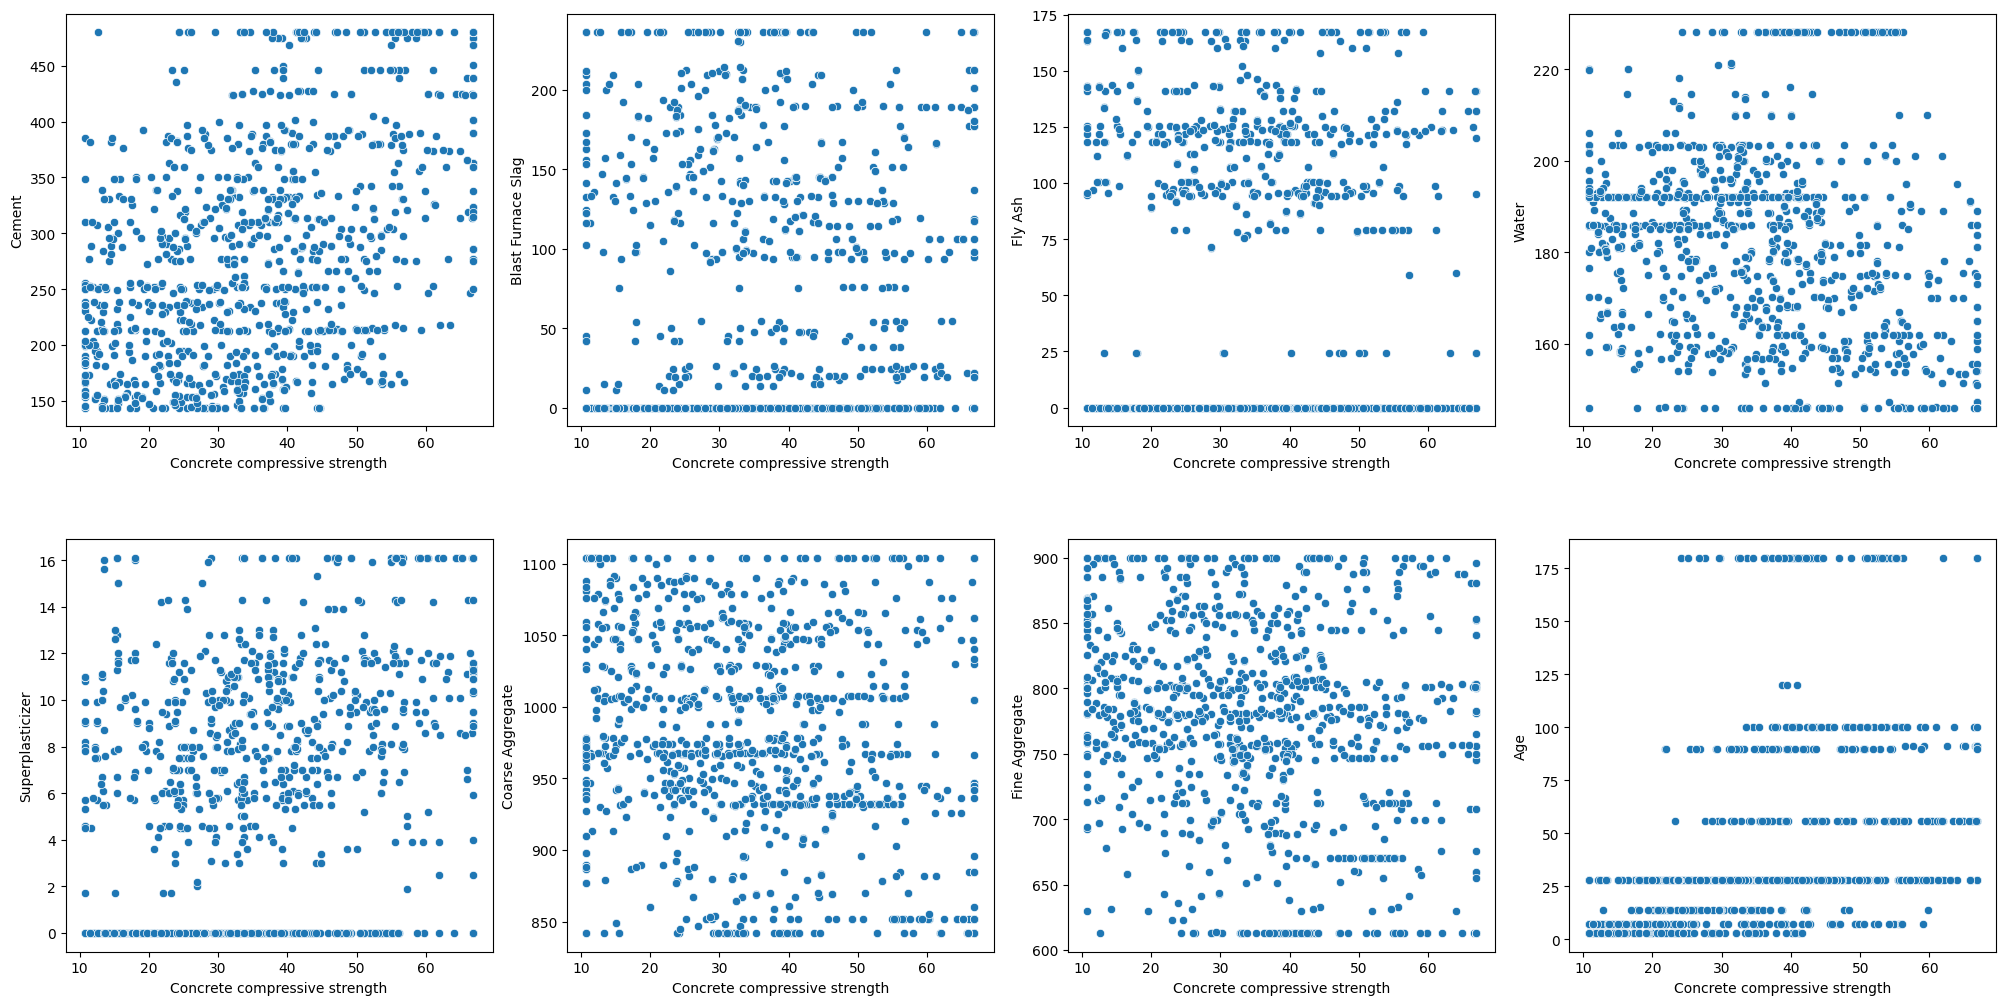

In [24]:
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in df.columns:
    if col != "Concrete compressive strength":
        sns.scatterplot(x ="Concrete compressive strength",y=col, data=df_winsorized, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Se utiliza el algoritmo de árbol de decisión para seleccionar las mejores características para el modelo

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel


X = df_winsorized.drop(columns=['Concrete compressive strength'])
y = df_winsorized['Concrete compressive strength']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


importances = model.feature_importances_


feature_importances = pd.DataFrame({'Característica': X.columns, 'Importancia': importances})
feature_importances = feature_importances.sort_values(by='Importancia', ascending=False)
print("Importancia de las características:")
print(feature_importances)


selector = SelectFromModel(model, prefit=True)
X_selected = selector.transform(X)
print("Características seleccionadas:", X.columns[selector.get_support()])


Importancia de las características:
       Característica  Importancia
7                 Age     0.339641
0              Cement     0.323639
3               Water     0.120407
4    Superplasticizer     0.064038
1  Blast Furnace Slag     0.061965
6      Fine Aggregate     0.040816
5    Coarse Aggregate     0.028488
2             Fly Ash     0.021007
Características seleccionadas: Index(['Cement', 'Age'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


También se puede realizar un mapa de correlación para validar esto:

                                 Cement  Blast Furnace Slag   Fly Ash  \
Cement                         1.000000           -0.268119 -0.404252   
Blast Furnace Slag            -0.268119            1.000000 -0.323795   
Fly Ash                       -0.404252           -0.323795  1.000000   
Water                         -0.071285            0.109026 -0.271399   
Superplasticizer               0.037772            0.054829  0.453404   
Coarse Aggregate              -0.143928           -0.304473  0.013037   
Fine Aggregate                -0.214478           -0.280699  0.092107   
Age                            0.074795           -0.048925 -0.131139   
Concrete compressive strength  0.493343            0.137969 -0.095728   

                                  Water  Superplasticizer  Coarse Aggregate  \
Cement                        -0.071285          0.037772         -0.143928   
Blast Furnace Slag             0.109026          0.054829         -0.304473   
Fly Ash                       -0

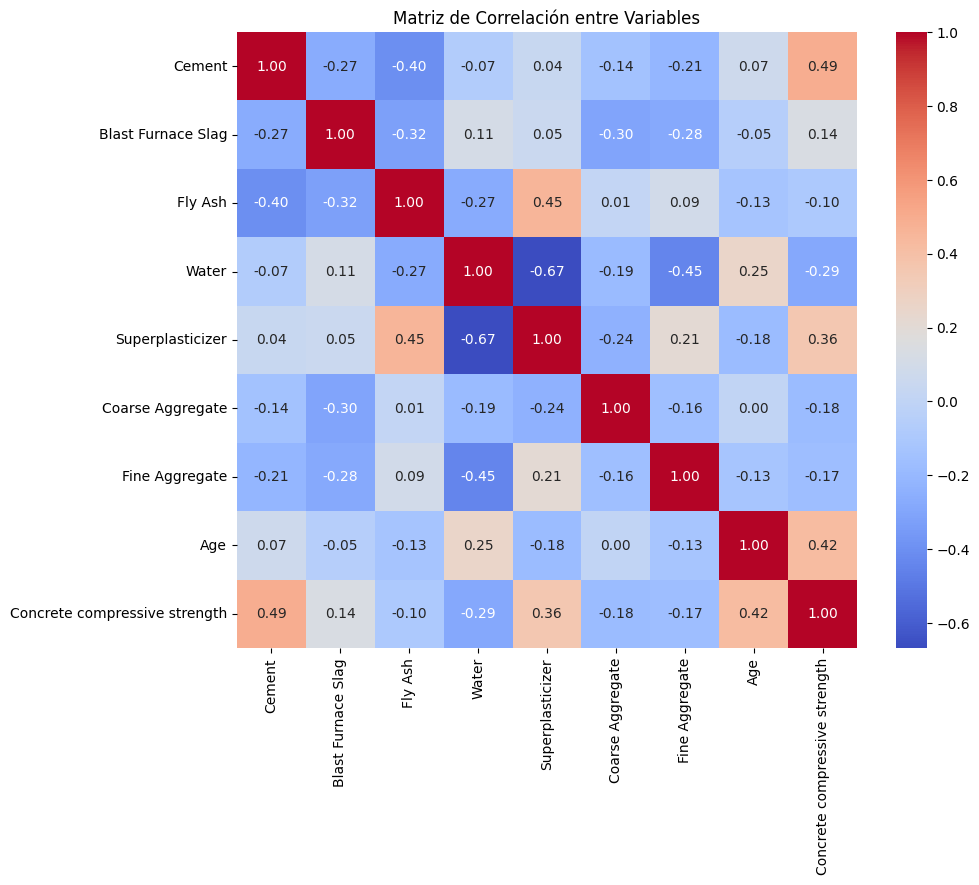

In [15]:

correlation_matrix = df_winsorized.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables")
plt.show()

De acuerdo al análisis anterior, las mejores características a seleccionar son edad, cemento y superplasticizer.

Recordando que los árboles de decisión trabajan con variables categóricas, lo recomendable sería realizar una indexación de dichos valores.

In [16]:
import pandas as pd

df_categorico = df_winsorized.copy()


columnas_categoricas = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
                        'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']


n_bins = 2

for columna in columnas_categoricas:
    df_categorico[columna] = pd.cut(df_categorico[columna], bins=n_bins, labels=False)

print(df_categorico.head())


   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0       1                   0        0      0                 0   
1       1                   0        0      0                 0   
2       1                   1        0      1                 0   
3       1                   1        0      1                 0   
4       0                   1        0      1                 0   

   Coarse Aggregate  Fine Aggregate  Age  Concrete compressive strength  
0                 1               0    0                          66.82  
1                 1               0    0                          61.89  
2                 0               0    1                          40.27  
3                 0               0    1                          41.05  
4                 1               1    1                          44.30  


Con lo anteriormente dicho se usarán solamente las dos características que serían cemento y edad, donde se realizará el entrenamiento y el uso del modelo de árbol de decisión.

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np


X = df_categorico.drop(columns=['Concrete compressive strength'])
y = df_categorico['Concrete compressive strength']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = DecisionTreeRegressor(criterion="squared_error", max_depth=2)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Error Absoluto Medio Porcentual (MAPE): {mape:.4%}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")





Error Cuadrático Medio (MSE): 183.9338
Raíz del Error Cuadrático Medio (RMSE): 13.5622
Error Absoluto Medio (MAE): 11.2697
Error Absoluto Medio Porcentual (MAPE): 43.5300%
Coeficiente de Determinación (R²): 0.2491


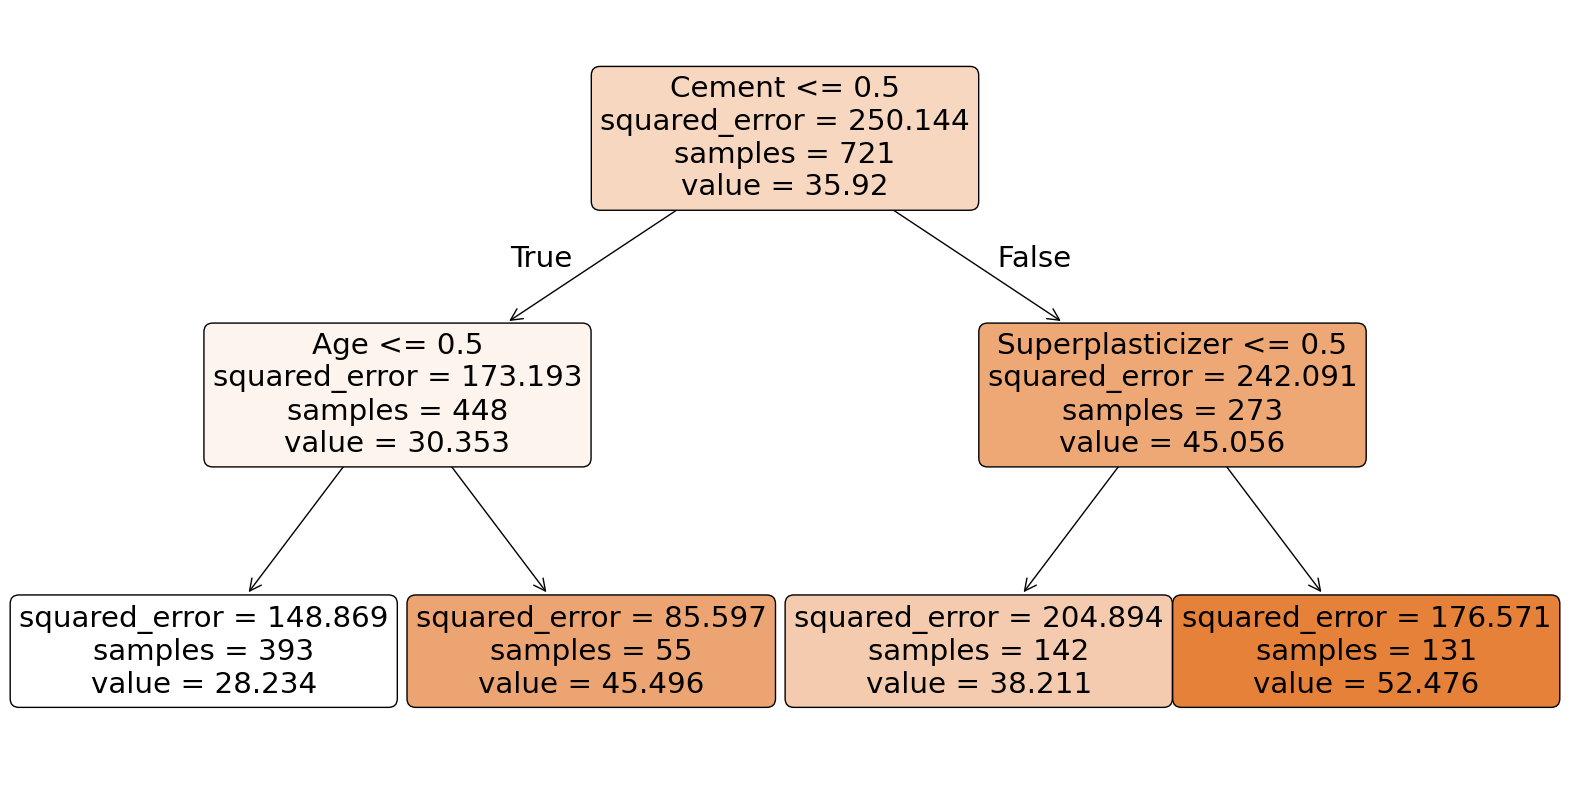

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()


Profundidad de 4

In [29]:
model = DecisionTreeRegressor(criterion="squared_error", max_depth=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Error Absoluto Medio Porcentual (MAPE): {mape:.4%}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Error Cuadrático Medio (MSE): 156.9438
Raíz del Error Cuadrático Medio (RMSE): 12.5277
Error Absoluto Medio (MAE): 10.2984
Error Absoluto Medio Porcentual (MAPE): 40.2534%
Coeficiente de Determinación (R²): 0.3593


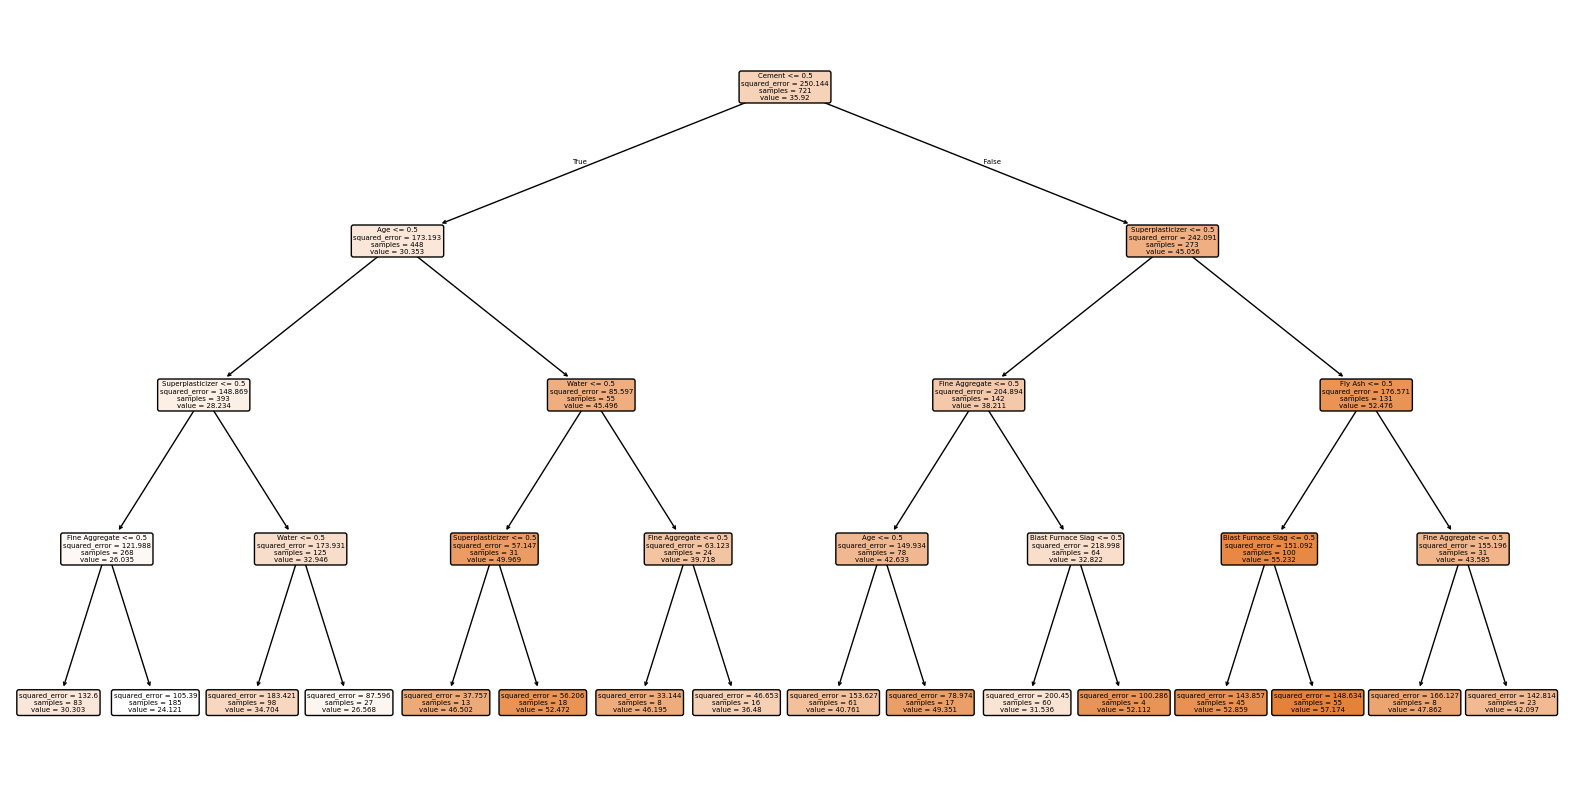

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

Profundidad de 30

In [31]:
model = DecisionTreeRegressor(criterion="squared_error", max_depth=30)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Error Absoluto Medio Porcentual (MAPE): {mape:.4%}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Error Cuadrático Medio (MSE): 142.7491
Raíz del Error Cuadrático Medio (RMSE): 11.9478
Error Absoluto Medio (MAE): 9.4816
Error Absoluto Medio Porcentual (MAPE): 36.0735%
Coeficiente de Determinación (R²): 0.4172


En lo anterior es posible observar que los datos no se ajustan completamente al modelo (ya que tiene un R^2 de 0.4172), por lo que se puede optar por elegir las características sin normalizar.

In [32]:

X = df.drop(columns=['Concrete compressive strength'])
y = df['Concrete compressive strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = DecisionTreeRegressor(criterion="squared_error", max_depth=30)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Error Absoluto Medio Porcentual (MAPE): {mape:.4%}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")


Error Cuadrático Medio (MSE): 47.1950
Raíz del Error Cuadrático Medio (RMSE): 6.8699
Error Absoluto Medio (MAE): 4.4246
Error Absoluto Medio Porcentual (MAPE): 14.8532%
Coeficiente de Determinación (R²): 0.8256


Como es de observarse, el modelo mejoró significativamente, teniendo un 82.56 % de precisión al introducir las variables sin normalizar.